In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from transformers import AutoTokenizer, RobertaModel, BertTokenizer, BertModel
# from surprisal import AutoHuggingFaceModel
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import shuffle
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import joblib

from utils import *
from word_fixations import *
from word_properties import *
from regression_model import *
from bert_trt import *
from pretty_plots import *

c:\Users\anama\anaconda3\envs\eye_tracking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
words_dict_023 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_023.csv', properties_dir='properties\properties_romanian_023')
words_dict_008 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_008.csv', properties_dir='properties\properties_romanian_008')
words_dict_009 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_009.csv', properties_dir='properties\properties_romanian_009')
words_dict_010 = get_word_sentence_fixations_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_010.csv', properties_dir='properties\properties_romanian_009')

In [3]:
words_dict_023 = compute_average_TRT(words_dict_023)
words_dict_008 = compute_average_TRT(words_dict_008)
words_dict_009 = compute_average_TRT(words_dict_009)
words_dict_010 = compute_average_TRT(words_dict_010)

In [4]:
words_dict = merge_words_dicts([words_dict_010, words_dict_009, words_dict_008, words_dict_023])

In [2]:
words_dict = get_merged_words_dict_from_csv(csv_path='word_sentence_fixations\words_dict_romanian_merged.csv', properties_dir='properties\properties_romanian_009')

In [5]:
for stimulus_key in words_dict:
	print(f"Stimulus: {stimulus_key}")
	for word_idx in words_dict[stimulus_key]:
		print(f"  Word Index: {word_idx}")
		word = words_dict[stimulus_key][word_idx]['word']
		sentence = words_dict[stimulus_key][word_idx]['sentence']
		word_idx_in_sentence = words_dict[stimulus_key][word_idx]['word_idx_in_sentence']
		properties = words_dict[stimulus_key][word_idx]['properties']
		average_TRT = words_dict[stimulus_key][word_idx]['average_TRT']
		print(f"    Word: {word}")
		print(f"    Sentence: {sentence}")
		print(f"    Word Index in Sentence: {word_idx}")
		print(f"    Properties: {properties}")
		print(f"    Average TRT: {average_TRT}")
		for subject_id in words_dict[stimulus_key][word_idx]['subjects_fixations']:
			print(f"      Subject ID: {subject_id}")
			fixations = words_dict[stimulus_key][word_idx]['subjects_fixations'][subject_id]
			print(f"        Fixations: {fixations}")

Stimulus: arg_pisacowsmilk_10_page_1
  Word Index: 0
    Word: Laptele
    Sentence: Laptele de vacă - Introducere
    Word Index in Sentence: 0
    Properties: <word_properties.WordProperties object at 0x0000021EE7D8FB20>
    Average TRT: 286.0
      Subject ID: 10
        Fixations: Fixations: [236], TRT: 236
      Subject ID: 9
        Fixations: Fixations: [120], TRT: 120
      Subject ID: 8
        Fixations: Fixations: [197, 305], TRT: 502
  Word Index: 1
    Word: de
    Sentence: Laptele de vacă - Introducere
    Word Index in Sentence: 1
    Properties: <word_properties.WordProperties object at 0x0000021EE7D8FB50>
    Average TRT: 142.0
      Subject ID: 10
        Fixations: Fixations: [263], TRT: 263
      Subject ID: 9
        Fixations: Fixations: [], TRT: 0
      Subject ID: 8
        Fixations: Fixations: [163], TRT: 163
  Word Index: 2
    Word: vacă
    Sentence: Laptele de vacă - Introducere
    Word Index in Sentence: 2
    Properties: <word_properties.WordProperties

In [43]:
# Save the merged words_dict
save_merged_dict_to_csv(words_dict, 'word_sentence_fixations/words_dict_romanian_merged.csv')

In [3]:
# Create a dictionary excluding non-page stimuli
words_dict_reading = {}
for stimulus_key in words_dict:
	if 'page' in stimulus_key:
		words_dict_reading[stimulus_key] = words_dict[stimulus_key]

In [4]:
# Compute word properties for each word in the words_dict_reading
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		print(f"Computing properties for {stimulus_key} - Word Index: {word_idx}")
		words_dict_reading[stimulus_key][word_idx]['properties'].compute_properties()

Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 0
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 1
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 2
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 3
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 4
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 5
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for arg_pisacowsmilk_10_page_1 - Word Index: 6
Loading num_tokens from CSV file...
Loading surprisal from CSV file...
Computing properties for ar

In [10]:
# Save the properties
save_path = 'properties\properties_romanian_009\properties.csv'
save_properties_to_csv(words_dict_reading, save_path)

In [5]:
# Compute properties that require all sentences
# Compute transformer embeddings for each word in the words_dict_reading
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
model = BertModel.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
model.to(device)

# Extract sentences and word_ids
sentences = [words_dict_reading[stimulus_key][word_idx]['sentence'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]
# Eliminate duplicates but keep the original order
seen = set()
unique_sentences = [s for s in sentences if not (s in seen or seen.add(s))]
sentences = unique_sentences
word_ids = [words_dict_reading[stimulus_key][word_idx]['word_id'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]

# print(f"Sentences: {sentences}")
# print(f"Word IDs: {word_ids}")

model.eval()

with torch.no_grad():
    encoded_inputs = tokenizer(sentences, return_tensors='pt', padding=True, return_offsets_mapping=True, truncation=False)

    offsets = encoded_inputs.pop("offset_mapping")

    outputs = model(**encoded_inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states

embeddings_first_layer = hidden_states[1]
embeddings_middle_layer = hidden_states[6]
embeddings_last_layer = hidden_states[-1]
embeddings_avg = torch.mean(torch.stack(hidden_states), dim=0)

bert_embeddings_first_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_first_layer, offsets=offsets)
bert_embeddings_middle_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_middle_layer, offsets=offsets)
bert_embeddings_last_layer = transformer_embedding(word_ids=word_ids, embeddings=embeddings_last_layer, offsets=offsets)
bert_embeddings_avg = transformer_embedding(word_ids=word_ids, embeddings=embeddings_avg, offsets=offsets)

# Add the BERT embeddings to the words_dict_reading
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		word_id = words_dict_reading[stimulus_key][word_idx]['word_id']
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_first_layer = bert_embeddings_first_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_middle_layer = bert_embeddings_middle_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_last_layer = bert_embeddings_last_layer[word_id]
		words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_avg = bert_embeddings_avg[word_id]

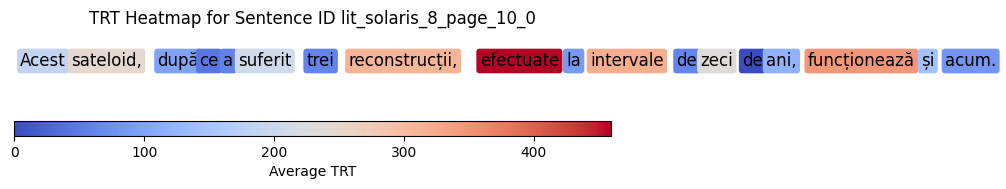

In [39]:
# Heatmap plot
plot_sentence_heatmap(words_dict=words_dict, sentence_id='lit_solaris_8_page_10_0')

In [6]:
# Numpy arrays
trt_reading = np.array([words_dict_reading[stimulus_key][word_idx]['average_TRT'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
length_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].length for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
num_tokens_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].num_tokens for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
freq_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].frequency for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
surprisal_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].surprisal for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
# surprisal_huggingface_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].surprisal_huggingface for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_first_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_first_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_middle_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_middle_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_last_layer_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_last_layer for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])
transformer_embedding_avg_reading = np.array([words_dict_reading[stimulus_key][word_idx]['properties'].transformer_embedding_avg for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]])

In [7]:
length_corr_reading = np.corrcoef(trt_reading, length_reading)[0, 1]
num_tokens_corr_reading = np.corrcoef(trt_reading, num_tokens_reading)[0, 1]
freq_corr_reading = np.corrcoef(trt_reading, freq_reading)[0, 1]
surprisal_corr_reading = np.corrcoef(trt_reading, surprisal_reading)[0, 1]
# surprisal_huggingface_corr_reading = np.corrcoef(trt_reading, surprisal_huggingface_reading)[0, 1]
print(f"Correlation between TRT and length (reading): {length_corr_reading}")
print(f"Correlation between TRT and number of tokens (reading): {num_tokens_corr_reading}")
print(f"Correlation between TRT and frequency (reading): {freq_corr_reading}")
print(f"Correlation between TRT and surprisal (reading): {surprisal_corr_reading}")
# print(f"Correlation between TRT and surprisal (HuggingFace) (reading): {surprisal_huggingface_corr_reading}")

Correlation between TRT and length (reading): 0.5911043695700106
Correlation between TRT and number of tokens (reading): 0.30057323477406367
Correlation between TRT and frequency (reading): -0.35820759902005506
Correlation between TRT and surprisal (reading): 0.3416815022860126


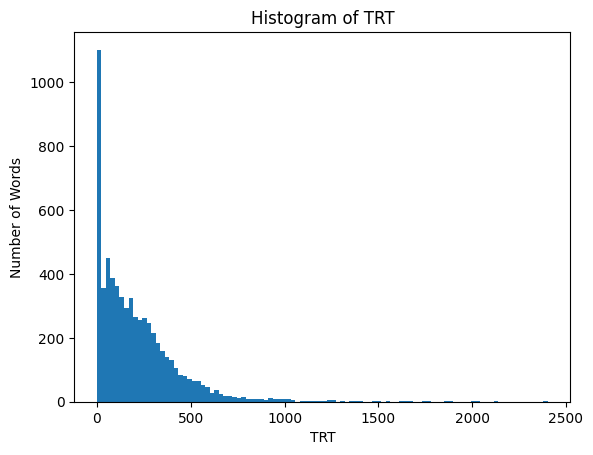

In [20]:
# Histogram of TRT
plt.hist(trt_reading, bins=100)
plt.title('Histogram of TRT')
plt.xlabel('TRT')
plt.ylabel('Number of Words')
plt.show()

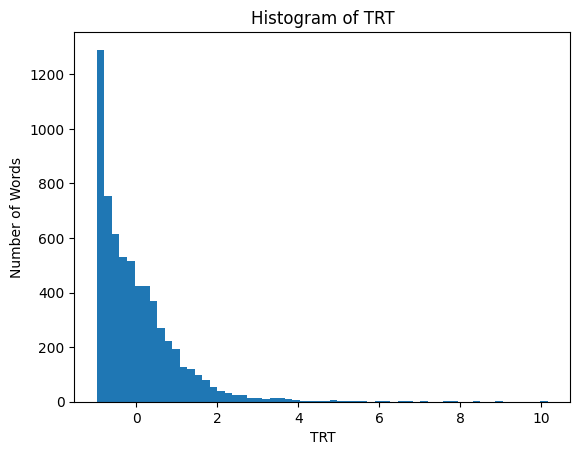

In [9]:
mean_trt = np.mean(trt_reading)
std_trt = np.std(trt_reading)
trt_standardized = (trt_reading - mean_trt) / std_trt

plt.hist(trt_standardized, bins=60)
plt.title('Histogram of TRT')
plt.xlabel('TRT')
plt.ylabel('Number of Words')
plt.show()

In [10]:
# Create a DataFrame from words_dict_reading with columns stimulus, stimulus_key, word_idx, word, sentence_id, sentence, word_idx_in_sentence, trt, and all properties
data = []
for stimulus_key in words_dict_reading:
	for word_idx in words_dict_reading[stimulus_key]:
		word_data = words_dict_reading[stimulus_key][word_idx]
		row = {
			'stimulus': stimulus_key.split('_')[1],
			'stimulus_key': stimulus_key,
			'word_idx': word_idx,
			'word': word_data['word'],
			'sentence_id': word_data['sentence_id'],
			'sentence': word_data['sentence'],
			'word_idx_in_sentence': word_data['word_idx_in_sentence'],
			'trt': word_data['average_TRT'],
			'length': word_data['properties'].length,
			'num_tokens': word_data['properties'].num_tokens,
			'frequency': word_data['properties'].frequency,
			'surprisal': word_data['properties'].surprisal,
			'transformer_embedding_first_layer': word_data['properties'].transformer_embedding_first_layer,
			'transformer_embedding_middle_layer': word_data['properties'].transformer_embedding_middle_layer,
			'transformer_embedding_last_layer': word_data['properties'].transformer_embedding_last_layer,
			'transformer_embedding_avg': word_data['properties'].transformer_embedding_avg,
		}
		data.append(row)
df = pd.DataFrame(data)

X_train shape: (5041, 4), y_train shape: (5041,)
X_test shape: (1286, 4), y_test shape: (1286,)
Model: LinearRegression
  MSE: 0.6018
  R^2: 0.3629
  Pearson Correlation: 0.6046
  Spearman Correlation: 0.6713
  Accuracy: 93.2453


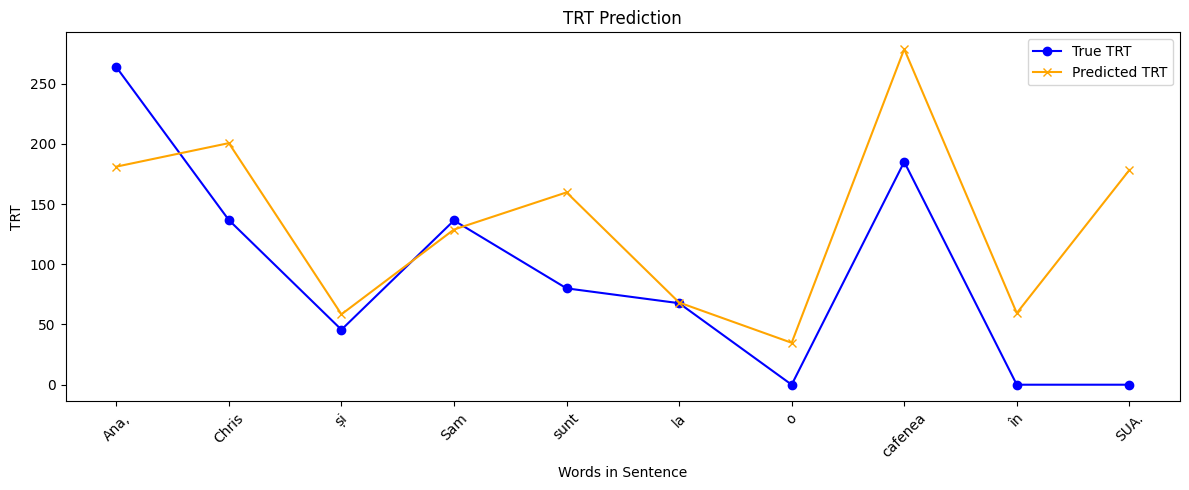

Model: ElasticNet
  MSE: 0.6045
  R^2: 0.3601
  Pearson Correlation: 0.6037
  Spearman Correlation: 0.6722
  Accuracy: 93.2239


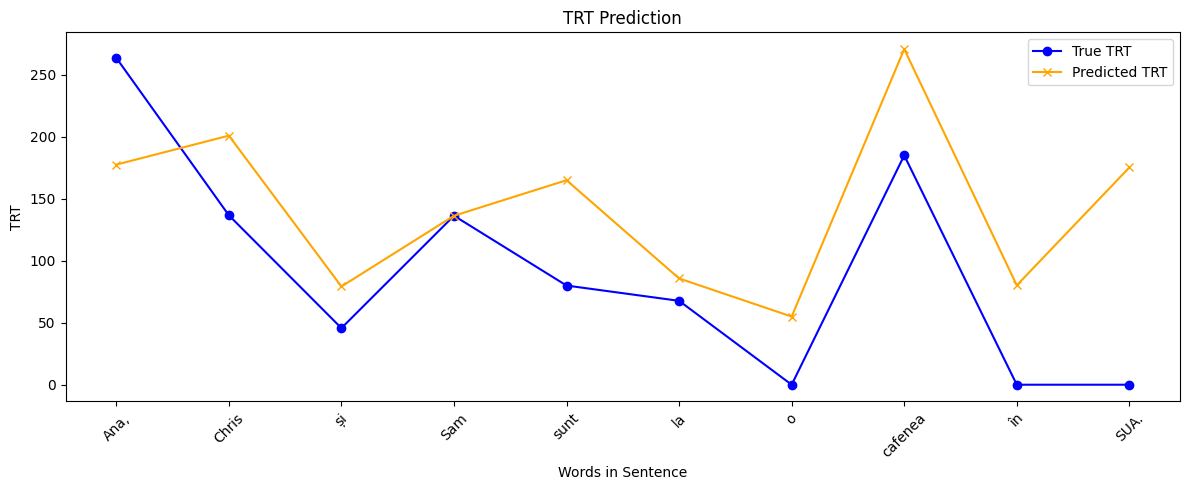

Model: SGDRegressor
  MSE: 0.6036
  R^2: 0.3611
  Pearson Correlation: 0.6030
  Spearman Correlation: 0.6724
  Accuracy: 93.2131


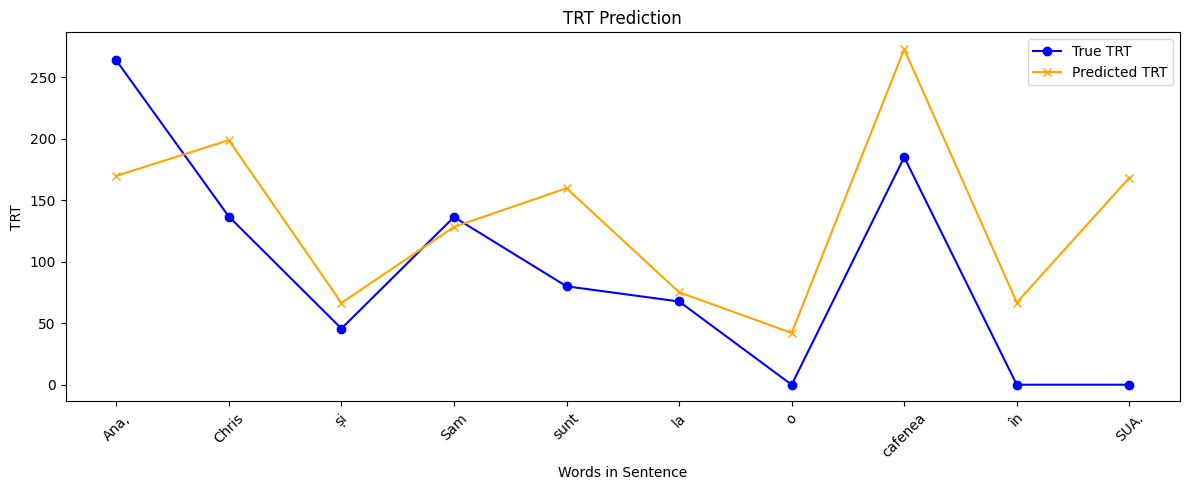

Model: BayesianRidge
  MSE: 0.6017
  R^2: 0.3630
  Pearson Correlation: 0.6046
  Spearman Correlation: 0.6712
  Accuracy: 93.2432


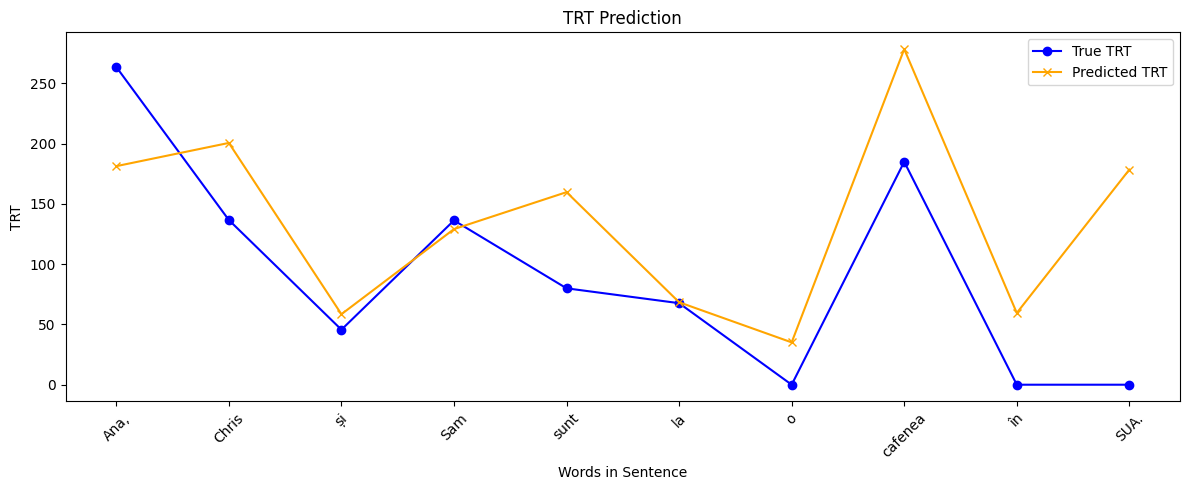

Model: SVR
  MSE: 0.6386
  R^2: 0.3239
  Pearson Correlation: 0.6024
  Spearman Correlation: 0.6724
  Accuracy: 92.9648


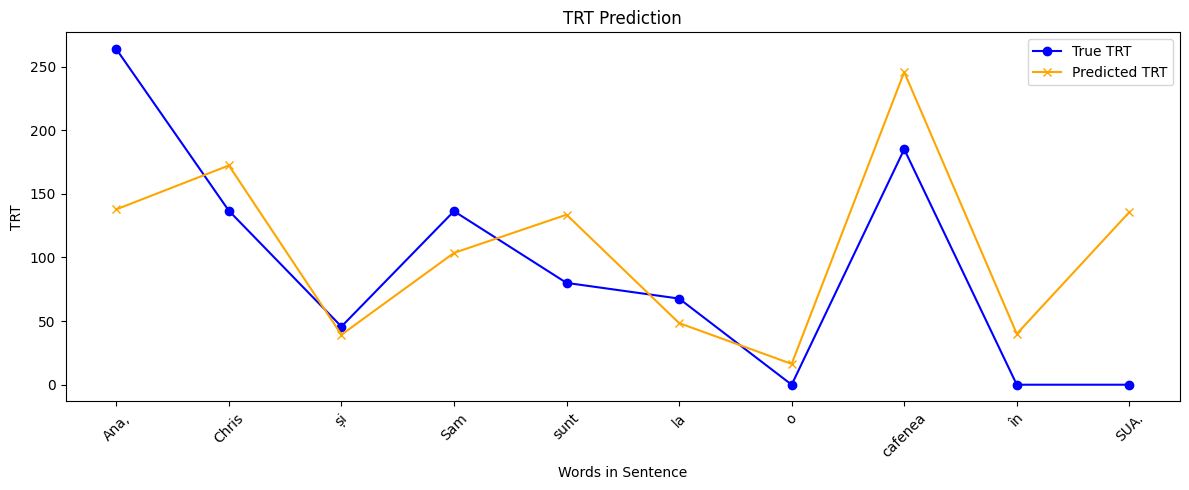

Model: SVR
  MSE: 0.6408
  R^2: 0.3216
  Pearson Correlation: 0.6008
  Spearman Correlation: 0.6661
  Accuracy: 87.6582


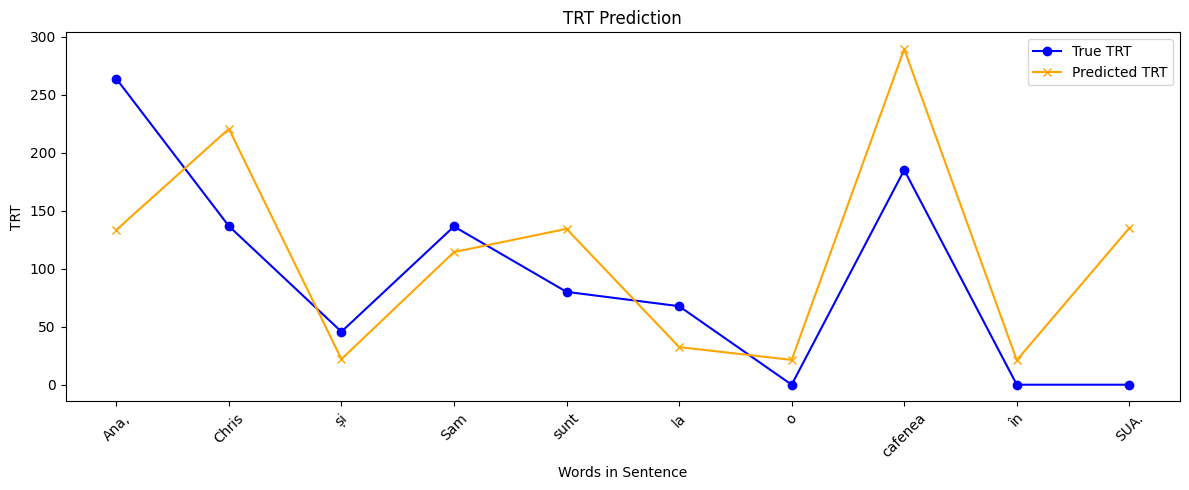

Model: KNeighborsRegressor
  MSE: 0.7007
  R^2: 0.2582
  Pearson Correlation: 0.5388
  Spearman Correlation: 0.6226
  Accuracy: 88.6737


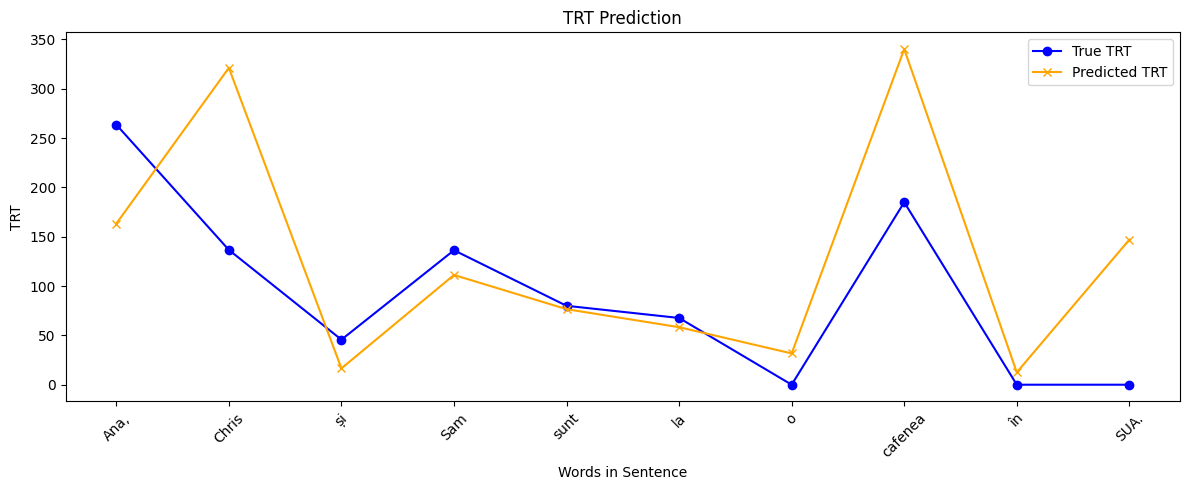

Model: RandomForestRegressor
  MSE: 0.6605
  R^2: 0.3008
  Pearson Correlation: 0.5795
  Spearman Correlation: 0.6280
  Accuracy: 92.2309


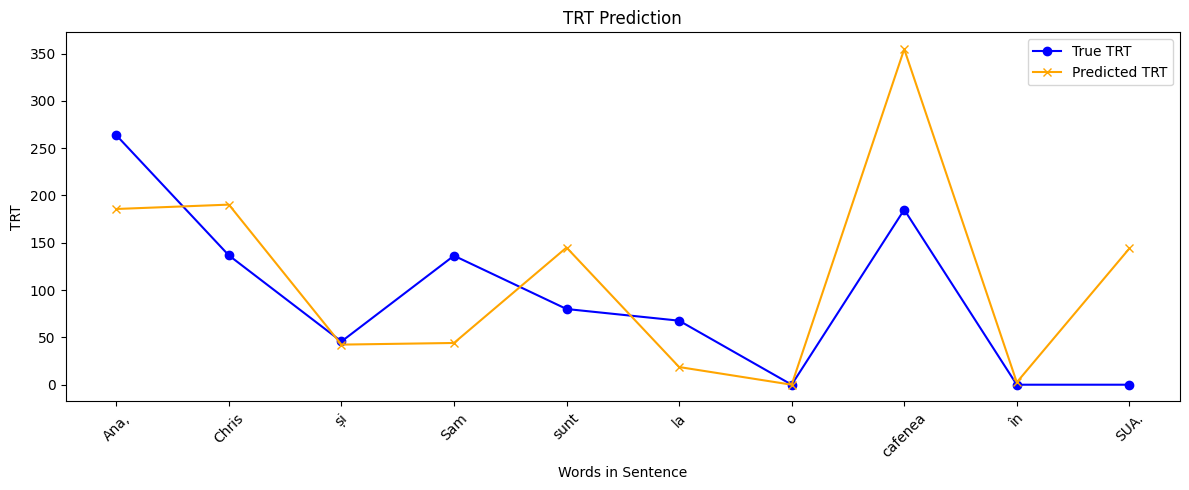

Model: GradientBoostingRegressor
  MSE: 0.5678
  R^2: 0.3989
  Pearson Correlation: 0.6331
  Spearman Correlation: 0.6850
  Accuracy: 92.6447


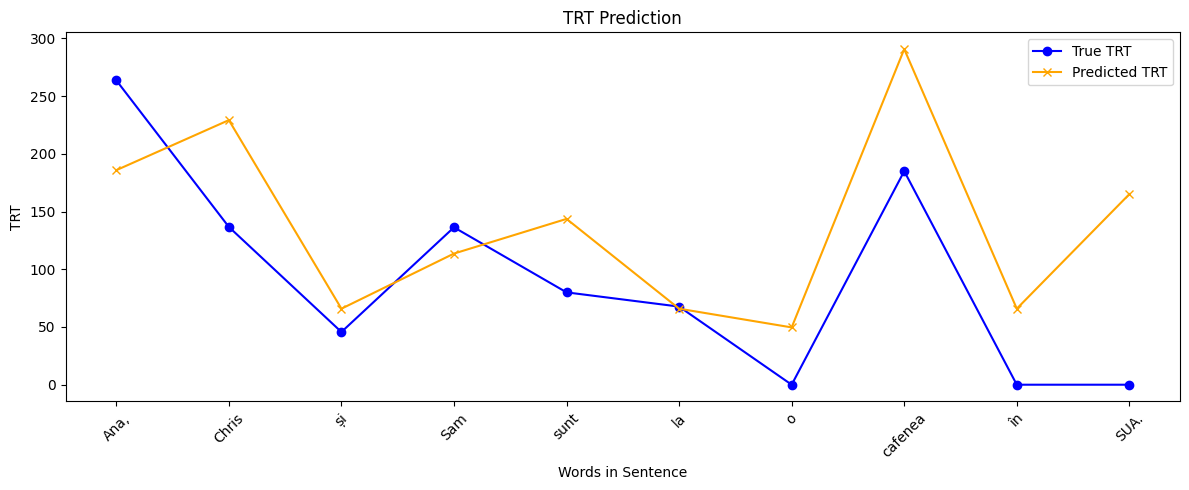

Model: HistGradientBoostingRegressor
  MSE: 0.5856
  R^2: 0.3801
  Pearson Correlation: 0.6194
  Spearman Correlation: 0.6797
  Accuracy: 87.8072


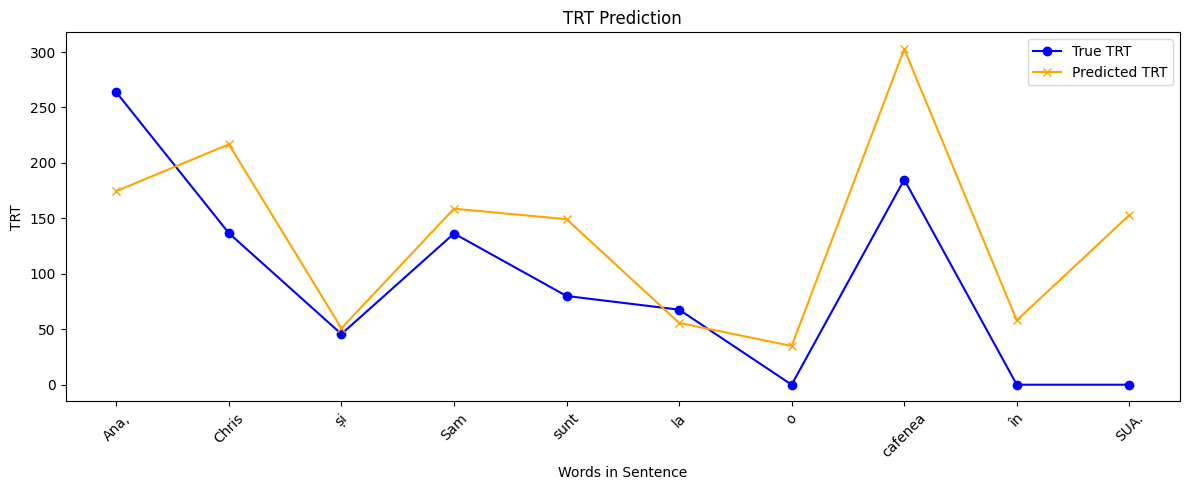

Model: KernelRidge
  MSE: 0.6018
  R^2: 0.3629
  Pearson Correlation: 0.6046
  Spearman Correlation: 0.6713
  Accuracy: 93.2451


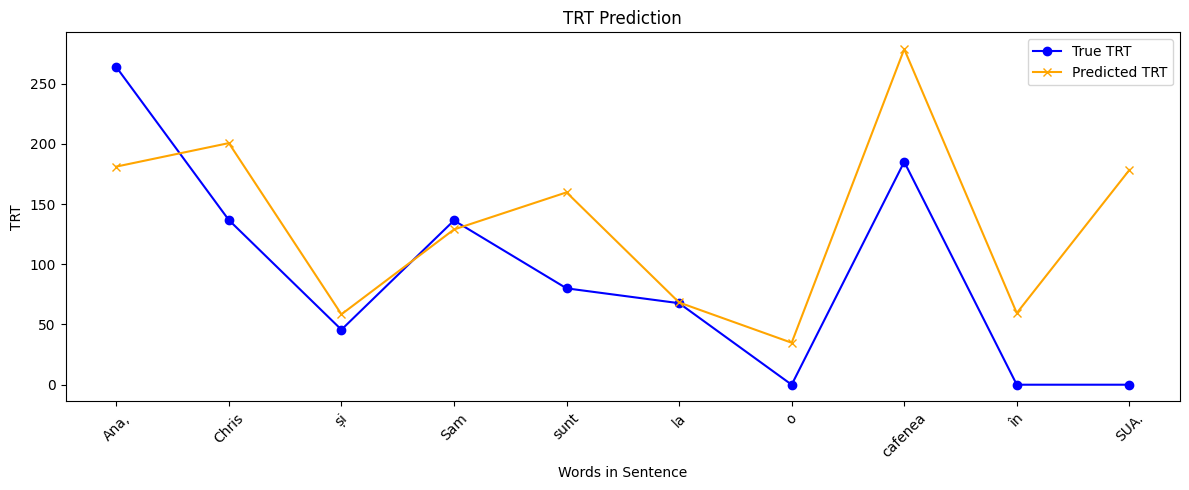

Model: KernelRidge
  MSE: 0.5989
  R^2: 0.3660
  Pearson Correlation: 0.6072
  Spearman Correlation: 0.6673
  Accuracy: 86.5524


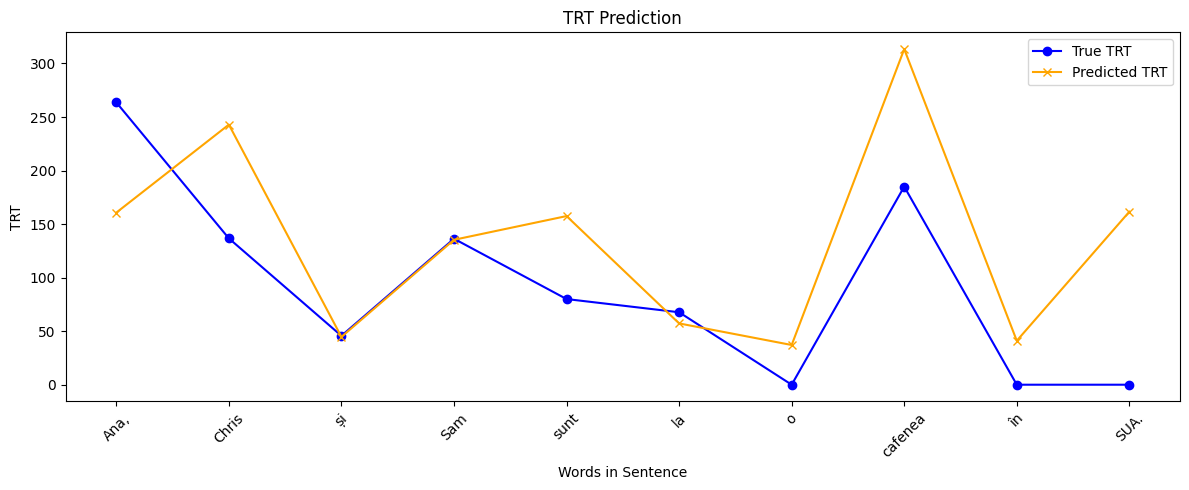

Model: MLPRegressor
  MSE: 0.6035
  R^2: 0.3611
  Pearson Correlation: 0.6059
  Spearman Correlation: 0.6697
  Accuracy: 93.5829


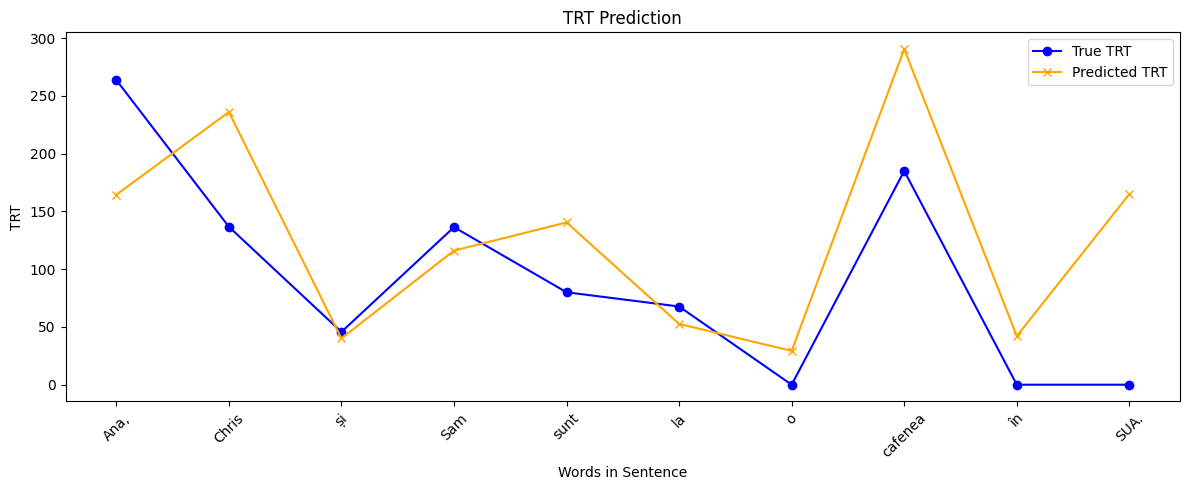

In [31]:
unique_sentences = df['sentence_id'].unique()
train_ids, test_ids = train_test_split(unique_sentences, test_size=0.2, random_state=42)

train_df = df[df['sentence_id'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)

features = ['length', 'num_tokens', 'frequency', 'surprisal']
X_train = train_df[features]
X_test = test_df[features]

# X_train = np.stack(train_df['transformer_embedding_avg'].values)
# X_test = np.stack(test_df['transformer_embedding_avg'].values)

# scalar_features = ['length', 'num_tokens', 'frequency', 'surprisal']
# embedding_dim = len(train_df['transformer_embedding_avg'].iloc[0])
# embedding_cols = [f'emb_{i}' for i in range(embedding_dim)]
# train_embeddings = pd.DataFrame(train_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
# test_embeddings = pd.DataFrame(test_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
# X_train = pd.concat([train_df[scalar_features].reset_index(drop=True), train_embeddings], axis=1)
# X_test = pd.concat([test_df[scalar_features].reset_index(drop=True), test_embeddings], axis=1)

y_train = train_df['trt']
y_test = test_df['trt']

# Shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardize the target variable
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

models = [
    LinearRegression(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    SGDRegressor(max_iter=1000, tol=1e-3),
    BayesianRidge(),
	SVR(kernel='linear'),
    SVR(kernel='rbf'),
	KNeighborsRegressor(n_neighbors=5),
	RandomForestRegressor(n_estimators=50, random_state=42),
	GradientBoostingRegressor(n_estimators=25, learning_rate=0.1, max_depth=3, random_state=42),
	HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42),
    KernelRidge(kernel='linear'),
	KernelRidge(kernel='rbf'),
	MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, learning_rate_init=0.001, random_state=42)
]

for model in models:
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)

	# Calculate metrics
	mse = mean_squared_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	pearson_corr = pearsonr(y_test, y_pred)[0]
	spearman_corr = spearmanr(y_test, y_pred)[0]

	# Convert back to original TRT scale
	y_test_orig = y_test * y_std + y_mean
	y_pred_orig = y_pred * y_std + y_mean
	# Bring the TRT to [0, 100] range
	y_test_100 = (y_test_orig - np.min(y_test_orig)) / (np.max(y_test_orig) - np.min(y_test_orig)) * 100
	y_pred_100 = (y_pred_orig - np.min(y_pred_orig)) / (np.max(y_pred_orig) - np.min(y_pred_orig)) * 100
	# print(f"y_test_100: {y_test_100}")
	# print(f"y_pred_100: {y_pred_100}")
	# print(f"y_test_100 min: {np.min(y_test_100)}, max: {np.max(y_test_100)}")
	# print(f"y_pred_100 min: {np.min(y_pred_100)}, max: {np.max(y_pred_100)}")
	mae = mean_absolute_error(y_test_100, y_pred_100)
	acc = 100 - mae

	print(f"Model: {model.__class__.__name__}")
	print(f"  MSE: {mse:.4f}")
	print(f"  R^2: {r2:.4f}")
	print(f"  Pearson Correlation: {pearson_corr:.4f}")
	print(f"  Spearman Correlation: {spearman_corr:.4f}")
	# print(f"  MAE: {mae:.4f}")
	print(f"  Accuracy: {acc:.4f}")

	# Plot predictions vs true values for a sentence
	test_df = test_df.copy()
	test_df['pred_trt'] = y_pred
	sentence_id_to_plot = test_df['sentence_id'].iloc[0]
	sentence_df = test_df[test_df['sentence_id'] == sentence_id_to_plot]
	sentence_df = sentence_df.sort_values(by='word_idx_in_sentence')
	words = sentence_df['word'].tolist()
	true_trt = sentence_df['trt'].tolist()
	pred_trt = sentence_df['pred_trt'].tolist()
	# Bring pred_trt to the original TRT scale
	pred_trt = np.array(pred_trt) * y_std + y_mean
	plot_pred_and_true(pred_trt=pred_trt, true_trt=true_trt, words=words)

X_train shape: (5041, 772), y_train shape: (5041,)
X_test shape: (535, 772), y_test shape: (535,)
Validation loss: 0.6335058808326721
R^2 on validation set: 0.36527520418167114
Pearson correlation on validation set: 0.6098958838476081
Spearman correlation on validation set: 0.6839271407575808
Epoch 5, Loss: 0.23146168887615204, LR: 0.0001
Validation loss: 0.6723437309265137
R^2 on validation set: 0.3263625502586365
Pearson correlation on validation set: 0.6104251402862406
Spearman correlation on validation set: 0.707196400812088
Epoch 10, Loss: 0.05858682841062546, LR: 1e-05
Validation loss: 0.7217691540718079
R^2 on validation set: 0.27684205770492554
Pearson correlation on validation set: 0.5962426591010879
Spearman correlation on validation set: 0.6943486139002603
Epoch 15, Loss: 0.06924411654472351, LR: 1.0000000000000002e-06
Validation loss: 0.7166271209716797
R^2 on validation set: 0.281994104385376
Pearson correlation on validation set: 0.5968787656544946
Spearman correlation on

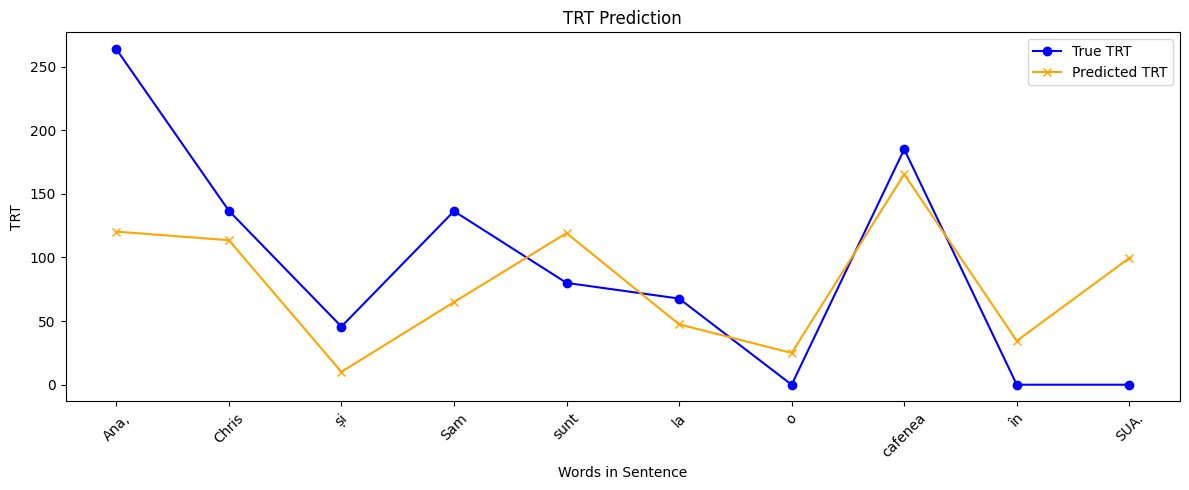

In [19]:
unique_sentences = df['sentence_id'].unique()
train_ids, test_ids = train_test_split(unique_sentences, test_size=0.2, random_state=42)
train_df = df[df['sentence_id'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)
test_ids, dev_ids = train_test_split(test_ids, test_size=0.5, random_state=42)
dev_df = df[df['sentence_id'].isin(dev_ids)].reset_index(drop=True)
test_df = df[df['sentence_id'].isin(test_ids)].reset_index(drop=True)

# features = ['length', 'num_tokens', 'frequency', 'surprisal']
# X_train = train_df[features]
# X_dev = dev_df[features]
# X_test = test_df[features]

# X_train = np.stack(train_df['transformer_embedding_avg'].values)
# X_dev = np.stack(dev_df['transformer_embedding_avg'].values)
# X_test = np.stack(test_df['transformer_embedding_avg'].values)

scalar_features = ['length', 'num_tokens', 'frequency', 'surprisal']
embedding_dim = len(train_df['transformer_embedding_avg'].iloc[0])
embedding_cols = [f'emb_{i}' for i in range(embedding_dim)]
train_embeddings = pd.DataFrame(train_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
dev_embeddings = pd.DataFrame(dev_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
test_embeddings = pd.DataFrame(test_df['transformer_embedding_avg'].tolist(), columns=embedding_cols)
X_train = pd.concat([train_df[scalar_features].reset_index(drop=True), train_embeddings], axis=1)
X_dev = pd.concat([dev_df[scalar_features].reset_index(drop=True), dev_embeddings], axis=1)
X_test = pd.concat([test_df[scalar_features].reset_index(drop=True), test_embeddings], axis=1)

y_train = train_df['trt']
y_dev = dev_df['trt']
y_test = test_df['trt']

# Shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Standardize the trt
mean_trt = np.mean(y_train)
std_trt = np.std(y_train)
y_train = (y_train - mean_trt) / std_trt
y_dev = (y_dev - mean_trt) / std_trt
y_test = (y_test - mean_trt) / std_trt

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_dev_tensor = torch.tensor(X_dev, dtype=torch.float32)
y_dev_tensor = torch.tensor(y_dev, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
validation_dataset = TensorDataset(X_dev_tensor, y_dev_tensor)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

model = RegressionModel(input_dim=X_train.shape[1])
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
save_path = 'best_regression_model.pth'
num_epochs = 30
train_regression_model(model=model, train_loader=train_loader, validation_loader=validation_loader, criterion=criterion, optimizer=optimizer, scheduler=scheduler, save_path=save_path, num_epochs=num_epochs)
# Load the best model
model.load_state_dict(torch.load(save_path))
loss_test, r2_test, pearson_test, spearman_test, y_pred = evaluate_regression_model(model=model, test_loader=test_loader, criterion=criterion)

# Convert back to original TRT scale
y_pred_orig = y_pred * std_trt + mean_trt
y_true_orig = y_test_tensor.numpy() * std_trt + mean_trt
# Bring the TRT to [0, 100] range
y_pred_100 = (y_pred_orig - np.min(y_pred_orig)) / (np.max(y_pred_orig) - np.min(y_pred_orig)) * 100
y_true_100 = (y_true_orig - np.min(y_true_orig)) / (np.max(y_true_orig) - np.min(y_true_orig)) * 100
mae = mean_absolute_error(y_true_100, y_pred_100)
acc = 100 - mae

print(f"Test Loss: {loss_test:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Test Pearson Correlation: {pearson_test:.4f}")
print(f"Test Spearman Correlation: {spearman_test:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Plot predictions vs true values for a sentence
test_df = test_df.copy()
test_df['pred_trt'] = y_pred
sentence_id_to_plot = test_df['sentence_id'].iloc[0]
sentence_df = test_df[test_df['sentence_id'] == sentence_id_to_plot]
sentence_df = sentence_df.sort_values(by='word_idx_in_sentence')
words = sentence_df['word'].tolist()
true_trt = sentence_df['trt'].tolist()
pred_trt = sentence_df['pred_trt'].tolist()
# De-standardize the predictions
pred_trt = np.array(pred_trt) * std_trt + mean_trt
plot_pred_and_true(pred_trt=pred_trt, true_trt=true_trt, words=words)

In [34]:
# BERT Regression

# Get info from words_dict_reading
words = [words_dict_reading[stimulus_key][word_idx]['word'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]
sentences = [words_dict_reading[stimulus_key][word_idx]['sentence'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]
sentence_ids = [words_dict_reading[stimulus_key][word_idx]['sentence_id'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]
trt = [words_dict_reading[stimulus_key][word_idx]['average_TRT'] for stimulus_key in words_dict_reading for word_idx in words_dict_reading[stimulus_key]]

# Build data_sentences dictionary
# Key: sentence_id
# Value: dictionary with keys 'sentence', 'words', and 'trt'
data_sentences = dict()
for i in range(len(words)):
    if sentence_ids[i] not in data_sentences:
        data_sentences[sentence_ids[i]] = {
            'sentence': sentences[i],
            'words': [],
            'trt': []
		}
    data_sentences[sentence_ids[i]]['words'].append(words[i])
    data_sentences[sentence_ids[i]]['trt'].append(trt[i])

def normalize_trt(trt_list, min_val, max_val):
    return [(t - min_val) / (max_val - min_val) for t in trt_list]

max_trt = max([max(data_sentences[sentence_id]['trt']) for sentence_id in data_sentences])
min_trt = min([min(data_sentences[sentence_id]['trt']) for sentence_id in data_sentences])
for sentence_id in data_sentences:
	data_sentences[sentence_id]['trt'] = normalize_trt(data_sentences[sentence_id]['trt'], min_trt, max_trt)
    
# Print data_sentences for verification
# for sentence_id, data in data_sentences.items():
# 	print(f"Sentence ID: {sentence_id}")
# 	print(f"  Sentence: {data['sentence']}")
# 	print(f"  Words: {data['words']}")
# 	print(f"  TRT: {data['trt']}")
     
# Convert data_sentences to DataFrame to use it for dataset
data_sentences = pd.DataFrame(data_sentences).T

# Split the data into train, test and validation
train_dataset = data_sentences.sample(frac=0.8, random_state=200)
test_dataset = data_sentences.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)
validation_dataset = test_dataset.sample(frac=0.5, random_state=200)
test_dataset = test_dataset.drop(validation_dataset.index).reset_index(drop=True)
validation_dataset = validation_dataset.reset_index(drop=True)

print("FULL Dataset: {}".format(data_sentences.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("VALIDATION Dataset: {}".format(validation_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

# print(train_dataset.head())

# Set some parameters
MAX_LEN = 512 # for BERT
batch_size = 8
tokenizer = BertTokenizer.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")
best_model_path = 'bert_regression_model.pth'

# Set up the datasets and dataloaders
train_set = BERTRegressionDataset(dataframe=train_dataset, tokenizer=tokenizer, max_len=MAX_LEN)
validation_set = BERTRegressionDataset(dataframe=validation_dataset, tokenizer=tokenizer, max_len=MAX_LEN)
test_set = BERTRegressionDataset(dataframe=test_dataset, tokenizer=tokenizer, max_len=MAX_LEN)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_regr = BERTForRegression().to(device)
train_BERT_Regression(model=bert_regr, train_loader=train_loader, validation_loader=validation_loader, best_model_path=best_model_path, lr=0.0001, weight_decay=0.0001, num_epochs=6)

FULL Dataset: (250, 3)
TRAIN Dataset: (200, 3)
VALIDATION Dataset: (25, 3)
TEST Dataset: (25, 3)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at dumitrescustefan/bert-base-romanian-uncased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 